In [8]:
import pandas as pd


In [9]:
dataset=pd.read_csv("cropbynpk.csv")


In [10]:
dataset.head(3)

,N,P,K,Temperature,Humidity,Ph,Rain,Crop
0,76,39,24,24.254745,55.647099,6.995844,64.238455,maize
1,77,52,17,24.863749,65.742005,5.714800,75.822705,maize
2,74,39,23,22.626511,65.774729,6.780736,88.172510,maize


In [11]:
dataset.isnull().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
Ph             0
Rain           0
Crop           0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2415 non-null   int64  
 1   P            2415 non-null   int64  
 2   K            2415 non-null   int64  
 3   Temperature  2415 non-null   float64
 4   Humidity     2415 non-null   float64
 5   Ph           2415 non-null   float64
 6   Rain         2415 non-null   float64
 7   Crop         2415 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 151.1+ KB


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
# Split features and target
X = dataset.drop('Crop', axis=1)
y = dataset['Crop']



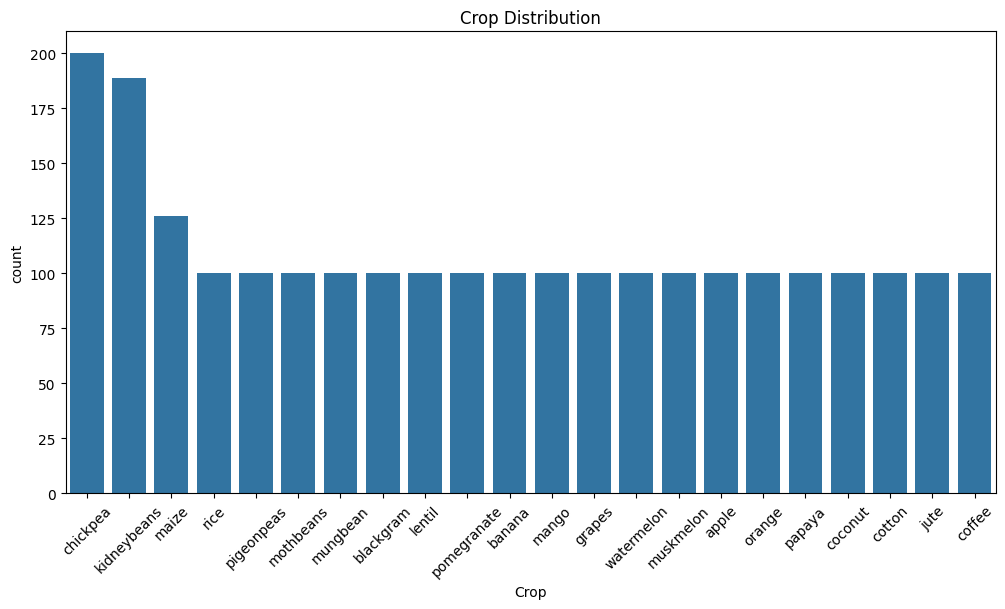

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=dataset, x='Crop', order=dataset['Crop'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Crop Distribution")
plt.show()


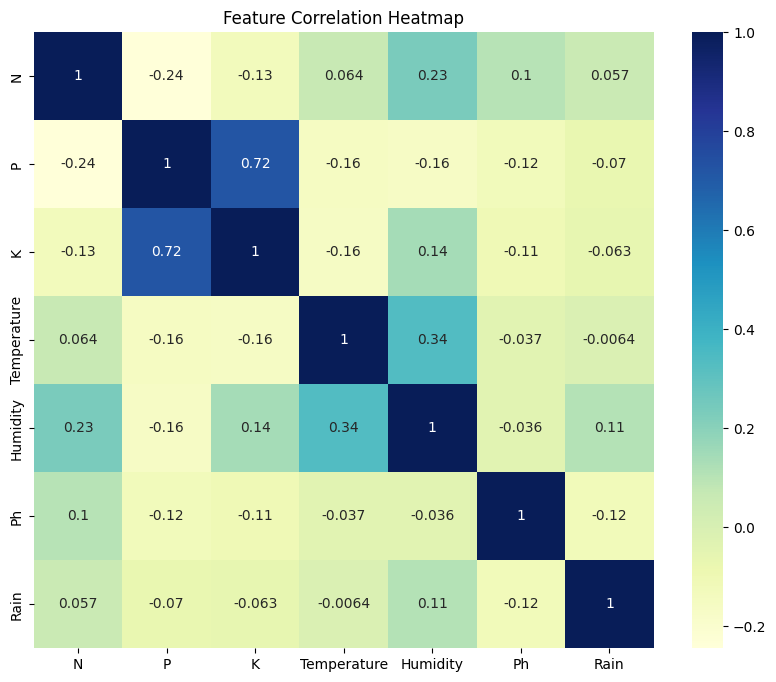

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.drop('Crop', axis=1).corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


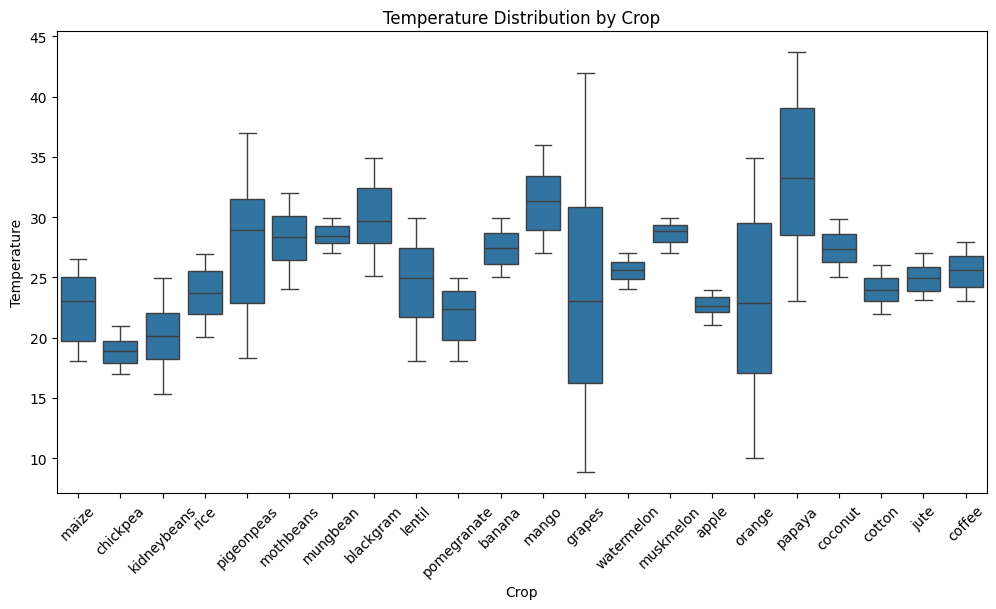

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset, x='Crop', y='Temperature')
plt.xticks(rotation=45)
plt.title("Temperature Distribution by Crop")
plt.show()


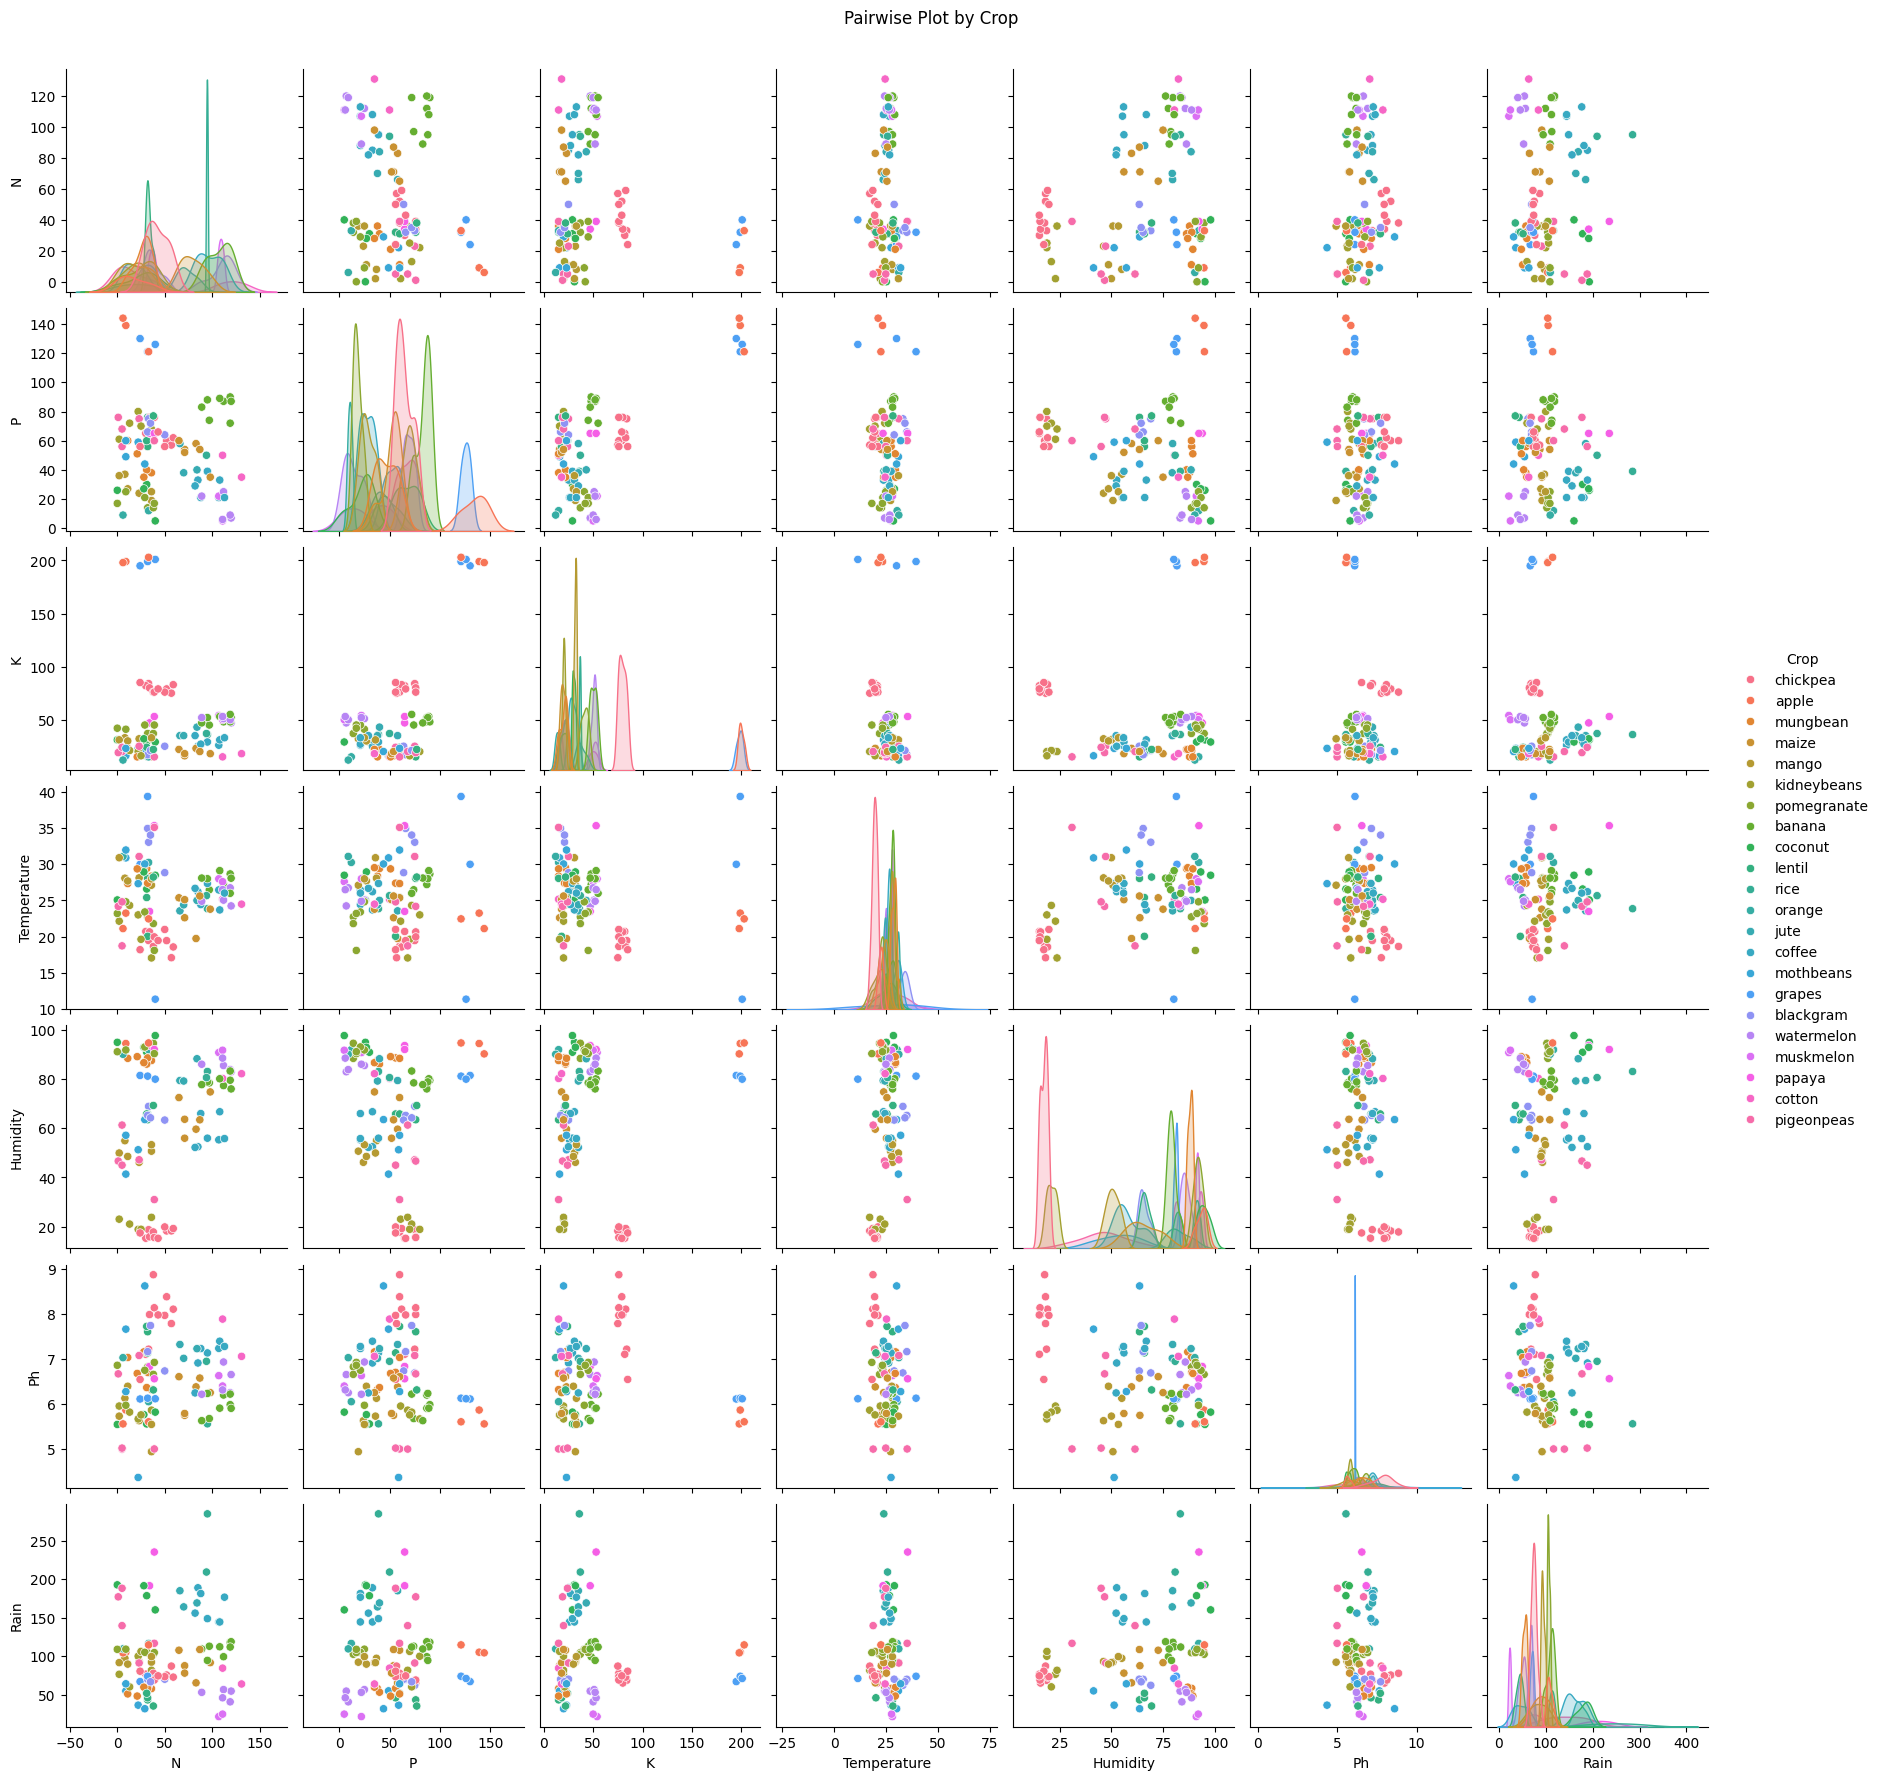

In [18]:
sns.pairplot(dataset.sample(100), hue='Crop', diag_kind='kde')
plt.suptitle("Pairwise Plot by Crop", y=1.02)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [23]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svn_pred = svm_model.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, svn_pred)

0.9813664596273292

In [27]:
classification_report(y_test, svn_pred, target_names=class_names)

'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        32\n      banana       1.00      1.00      1.00        19\n   blackgram       0.86      0.95      0.90        19\n    chickpea       1.00      1.00      1.00        47\n     coconut       1.00      1.00      1.00        16\n      coffee       1.00      1.00      1.00        22\n      cotton       0.95      1.00      0.98        21\n      grapes       1.00      1.00      1.00        17\n        jute       0.89      0.94      0.91        17\n kidneybeans       1.00      1.00      1.00        36\n      lentil       0.95      0.86      0.90        21\n       maize       1.00      0.95      0.97        20\n       mango       1.00      1.00      1.00        26\n   mothbeans       0.93      1.00      0.97        14\n    mungbean       1.00      1.00      1.00        17\n   muskmelon       1.00      1.00      1.00        12\n      orange       1.00      1.00      1.00        15\n      p

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knnpred = knn_model.predict(X_test)


In [29]:
accuracy_score(y_test, knnpred)

0.9813664596273292

In [32]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


C:\Users\Nejarul\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [14:47:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
accuracy_score(y_test, xgb_pred)

0.9937888198757764

In [34]:
test=[54, 39, 24, 24.64, 55.64, 6.99, 64.23]

In [35]:
import numpy as np
def result(test):
    test_input = np.array(test).reshape(1, -1)
    test_scaled = scaler.transform(test_input)
    pred_encoded = xgb_model.predict(test_scaled)
    pred_label = le.inverse_transform(pred_encoded)[0]
    return pred_label




In [36]:
result(test)

C:\Users\Nejarul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'mothbeans'

In [37]:
test = np.array([[76, 39, 24, 24.64, 55.64, 6.99, 64.23]])
test_scaled = scaler.transform(test)
pred_class = clf.predict(test_scaled)[0]
pred_crop = le.inverse_transform([pred_class])[0]

print(f"🌾 Predicted Crop (XGBoost NumPy): {pred_crop}")


C:\Users\Nejarul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NameError: name 'clf' is not defined

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# 1. Accuracy
accuracy = accuracy_score(y_test, xgb_pred)

# 2. Precision, Recall, F1 (macro/micro for multiclass)
precision_macro = precision_score(y_test, xgb_pred, average='macro')
recall_macro = recall_score(y_test, xgb_pred, average='macro')
f1_macro = f1_score(y_test, xgb_pred, average='macro')

# 3. Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)

# 4. Classification Report (per-class breakdown)
report = classification_report(y_test, xgb_pred, target_names=le.classes_)


In [39]:
accuracy

0.9937888198757764

In [40]:
accuracy_score(y_train,xgb_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1932, 483]

In [41]:
precision_macro


0.9930134680134679

In [42]:
recall_macro

0.9929971988795518

In [43]:
f1_macro

0.9927593300412252

In [44]:
cm


array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36,  0,  0,

In [45]:
report

'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        32\n      banana       1.00      1.00      1.00        19\n   blackgram       0.95      1.00      0.97        19\n    chickpea       1.00      1.00      1.00        47\n     coconut       1.00      1.00      1.00        16\n      coffee       1.00      1.00      1.00        22\n      cotton       1.00      1.00      1.00        21\n      grapes       1.00      1.00      1.00        17\n        jute       1.00      0.94      0.97        17\n kidneybeans       1.00      1.00      1.00        36\n      lentil       1.00      0.90      0.95        21\n       maize       1.00      1.00      1.00        20\n       mango       1.00      1.00      1.00        26\n   mothbeans       0.93      1.00      0.97        14\n    mungbean       1.00      1.00      1.00        17\n   muskmelon       1.00      1.00      1.00        12\n      orange       1.00      1.00      1.00        15\n      p

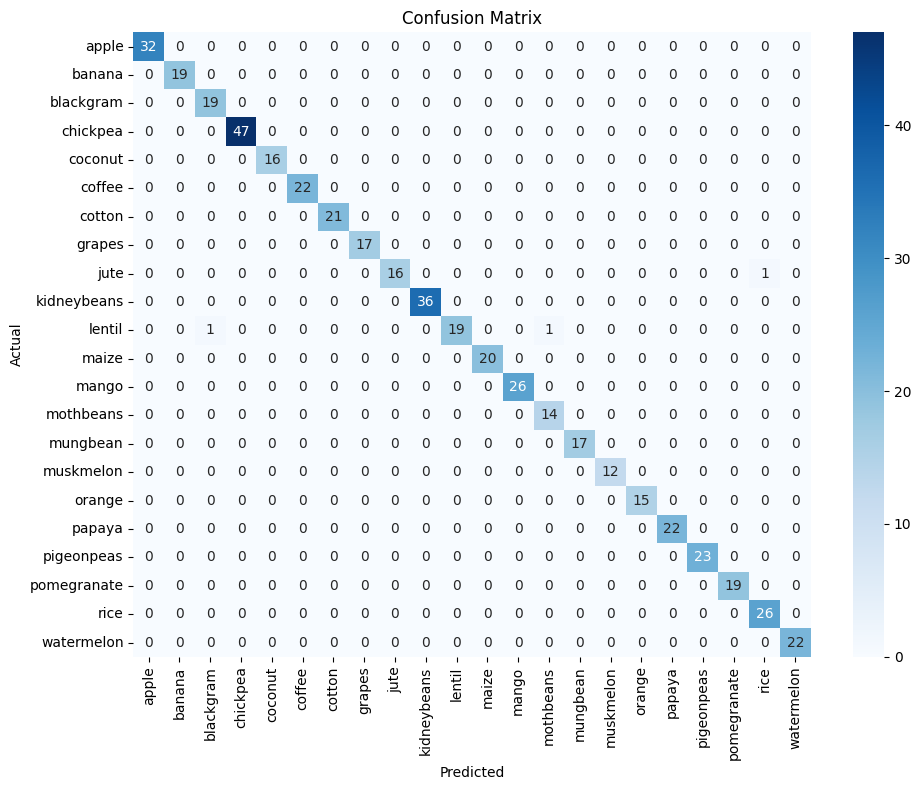

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [47]:
#Log Loss and K Accuracy Score Check

In [48]:
from sklearn.metrics import log_loss, top_k_accuracy_score

# Predict probabilities
y_proba = xgb_model.predict_proba(X_test)

# Log Loss
loss = log_loss(y_test, y_proba)

# Top-3 Accuracy
top3_acc = top_k_accuracy_score(y_test, y_proba, k=3)

print(f"🧮 Log Loss         : {loss:.4f}")
print(f"🥉 Top-3 Accuracy   : {top3_acc:.4f}")


🧮 Log Loss         : 0.0294
🥉 Top-3 Accuracy   : 0.9979


In [49]:
import numpy as np

def resultRecommendation(test, top_n=10):
    # Reshape and scale the test input
    test_input = np.array(test).reshape(1, -1)
    test_scaled = scaler.transform(test_input)
    
    # Predict probabilities for each class (crop)
    pred_proba = xgb_model.predict_proba(test_scaled)
    
    # Get indices of top N predictions (highest probability)
    top_n_idx = np.argsort(pred_proba[0])[::-1][:top_n]
    
    # Map indices to crop labels and corresponding probabilities
    top_n_labels = le.inverse_transform(top_n_idx)
    top_n_probs = pred_proba[0][top_n_idx]
    
    # Create a list of (crop_label, probability) pairs
    recommendations = [(label, prob) for label, prob in zip(top_n_labels, top_n_probs)]
    
    return recommendations


In [50]:
for i in resultRecommendation(test):
    print(i)

('maize', np.float32(0.9780538))
('mothbeans', np.float32(0.016494107))
('jute', np.float32(0.00065912656))
('blackgram', np.float32(0.00037741236))
('coffee', np.float32(0.00034326204))
('chickpea', np.float32(0.0003301994))
('muskmelon', np.float32(0.0003142986))
('grapes', np.float32(0.0002865258))
('orange', np.float32(0.00027879697))
('cotton', np.float32(0.0002735488))


C:\Users\Nejarul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

def train_and_save_full_model(df, feature_columns, label_column):
    # Features and Labels
    X = df[feature_columns]
    y = df[label_column]

    # Sanity checks
    if df.empty:
        raise ValueError("❌ DataFrame is empty. Cannot train the model.")
    if X.empty or y.empty:
        raise ValueError("❌ Feature columns or Label column are missing or empty in the DataFrame.")

    print(f"✅ Data loaded successfully: {X.shape[0]} samples, {X.shape[1]} features.")

    # Label Encoding for target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scaling Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train Model
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_scaled, y_encoded)

    # Wrap everything in a dictionary
    model_pipeline = {
        'model': model,
        'scaler': scaler,
        'label_encoder': le
    }

    # Save the entire pipeline as a pickle file
    with open(r'C:\Users\Nejarul\Desktop\Project Dataset\full_model_pipeline.pkl', 'wb') as f:
        pickle.dump(model_pipeline, f)
    
    print("✅ Full model pipeline saved as 'full_model_pipeline.pkl'!")



In [64]:
train_and_save_full_model(dataset,dataset['Crop'],dataset.drop('Crop', axis=1))

KeyError: "None of [Index(['maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize',\n       'maize', 'maize',\n       ...\n       'coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'coffee',\n       'coffee', 'coffee', 'coffee'],\n      dtype='object', length=2415)] are in the [columns]"

In [54]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\Nejarul\Desktop\Project Dataset


In [57]:
with open('C:\\Users\\Nejarul\\Desktop\\Project Dataset\\full_model_pipeline.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)


NameError: name 'model_pipeline' is not defined